In [1]:
import pandas as pd
import graph_ruggedness_de
import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np
import sequence_evolution
from ete3 import Tree
import ete3
import random
import pyvolve
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import brownian_motion
import matplotlib.colors as mcolors
from scipy.stats import spearmanr

QMetaType::registerTypedef: -- Type name 'PyQt_PyObject' previously registered as typedef of 'PyQt_PyObject' [1024], now registering as typedef of '' [-17958193].


### Sequence evolution simulation
The below cell simulates the simulation of amino acid sequences, drawing parameters from uniform distributions of realistic values. The cell has also been converted to functional code in `src.sequence_evolution.sample_sequences`. The output is a dictionary of Dirichlet energies over the first 50 eigenvectors of the simulated graph Laplacian, simulating the fitness function as increasingly rugged.

In [2]:
dir_dict = {}
prob_dict = {}
sample_dict = {}

sample_size = 100
for _ in tqdm(enumerate(range(sample_size))):
    try:

        num_nodes = int(np.random.uniform(50, 2000))
        mean_branch_length = np.random.uniform(0.01, 0.5)
        std_dev_branch_length = np.random.uniform(0.001, 0.1)
        alpha = np.random.uniform(0.1, 0.5)
        model = random.choice(('WAG', 'LG'))
        rate_categoies = 4
        sequence_length = int(np.random.uniform(100, 600))

        sample_info = {
            'num_nodes' : num_nodes,
            'mean_branch_length' : mean_branch_length,
            'std_dev_branch_length' : std_dev_branch_length,
            'alpha' : alpha,
            'model' : model,
            'sequence_length' : sequence_length
        }

        seq_dict = sequence_evolution.sequence_evolution(num_nodes=num_nodes,
                                                        mean_branch_length=mean_branch_length,
                                                        std_dev_branch_length=std_dev_branch_length,
                                                        alpha=alpha,
                                                        model=model,
                                                        rate_categories=rate_categoies,
                                                        sequence_length=sequence_length
                                                        )
        seq_ls = list(seq_dict.values())
        values = [0]*len(seq_ls)
        G = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                            values=values)
        eign_prob_dict = {}
        eign_dir_dict = {}
        for eign in list(range(50)):
            G = graph_ruggedness_de.compute_elementary_landscape(G=G, n=eign)
            dir_energy = graph_ruggedness_de.compute_dirichlet_energy(G=G)
            eign_dir_dict[eign] = dir_energy
        
        dir_dict[_] = eign_dir_dict
        prob_dict[_] = eign_prob_dict
        sample_dict[_] = sample_info
    
    except:
        continue


Computing OHE dictionary.: 20it [00:00, 246000.23it/s]
Adding nodes to graph.: 132it [00:00, 8860.35it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 132it [00:00, 154005.04it/s]
Computing OHE dictionary.: 20it [00:00, 152797.96it/s]
Adding nodes to graph.: 137it [00:00, 13485.24it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 137it [00:00, 151895.23it/s]
Computing OHE dictionary.: 20it [00:00, 125016.51it/s]
Adding nodes to graph.: 56it [00:00, 10550.29it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 56it [00:00, 215487.18it/s]
Computing OHE dictionary.: 20it [00:00, 208671.84it/s]
Adding nodes to graph.: 56it [00:00, 8717.38it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 56it [00:00, 231182.11it/s]


Connecting components


Computing OHE dictionary.: 20it [00:00, 132731.14it/s]
Adding nodes to graph.: 195it [00:00, 25435.84it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 195it [00:00, 134014.30it/s]
Computing OHE dictionary.: 20it [00:00, 253432.27it/s]
Adding nodes to graph.: 140it [00:00, 13184.90it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 140it [00:00, 169662.69it/s]
Computing OHE dictionary.: 20it [00:00, 266305.02it/s]
Adding nodes to graph.: 103it [00:00, 8925.53it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 103it [00:00, 181976.96it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 120525.98it/s]
Adding nodes to graph.: 156it [00:00, 16103.75it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 156it [00:00, 153234.53it/s]
Computing OHE dictionary.: 20it [00:00, 250406.21it/s]
Adding nodes to graph.: 118it [00:00, 10546.09it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 118it [00:00, 180170.32it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 299593.14it/s]
Adding nodes to graph.: 153it [00:00, 11975.45it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 153it [00:00, 152865.30it/s]
Computing OHE dictionary.: 20it [00:00, 237637.62it/s]
Adding nodes to graph.: 187it [00:00, 9782.42it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 187it [00:00, 151650.20it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 277768.48it/s]
Adding nodes to graph.: 99it [00:00, 9730.88it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 99it [00:00, 202851.05it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 270600.26it/s]
Adding nodes to graph.: 195it [00:00, 24258.91it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 195it [00:00, 147846.94it/s]
Computing OHE dictionary.: 20it [00:00, 252668.92it/s]
Adding nodes to graph.: 59it [00:00, 10279.30it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 59it [00:00, 246970.00it/s]
Computing OHE dictionary.: 20it [00:00, 133152.51it/s]
Adding nodes to graph.: 167it [00:00, 30220.41it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 167it [00:00, 151974.13it/s]
Computing OHE dictionary.: 20it [00:00, 127486.44it/s]
Adding nodes to graph.: 121it [00:00, 13795.55it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 121it [00:00, 169963.42it/s]
Computing OHE dictionary.: 20it [00:00, 258907.65it/s]
Adding nodes to graph.: 192it [00:00, 9318.52it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 192it [00:00, 152174.29it/s]
Computing OHE dictionary.: 20it [00:00, 128857.27it/s]
Adding nodes to graph.: 196it [00:00, 11456.65it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 196it [00:00, 133715.61it/s]
Computing OHE dictionary.: 20it [00:00, 246723.76it/s]
Adding nodes to graph.: 116it [00:00, 15413.40it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 116it [00:00, 181004.19it/s]


Connecting components


Computing OHE dictionary.: 20it [00:00, 90492.00it/s]
Adding nodes to graph.: 72it [00:00, 10279.46it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 72it [00:00, 233738.30it/s]
Computing OHE dictionary.: 20it [00:00, 234975.01it/s]
Adding nodes to graph.: 120it [00:00, 6783.52it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 120it [00:00, 183759.21it/s]
Computing OHE dictionary.: 20it [00:00, 140748.46it/s]
Adding nodes to graph.: 104it [00:00, 9174.43it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 104it [00:00, 190483.68it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 88487.43it/s]
Adding nodes to graph.: 55it [00:00, 11943.40it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 55it [00:00, 233016.89it/s]


Connecting components


Computing OHE dictionary.: 20it [00:00, 174037.51it/s]
Adding nodes to graph.: 186it [00:00, 27887.06it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 186it [00:00, 147279.69it/s]
Computing OHE dictionary.: 20it [00:00, 159479.24it/s]
Adding nodes to graph.: 103it [00:00, 13669.14it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 103it [00:00, 177272.59it/s]
Computing OHE dictionary.: 20it [00:00, 100945.94it/s]
Adding nodes to graph.: 95it [00:00, 10293.44it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 95it [00:00, 173620.43it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 158574.82it/s]
Adding nodes to graph.: 86it [00:00, 9730.78it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 86it [00:00, 191969.21it/s]


Connecting components


Computing OHE dictionary.: 20it [00:00, 276851.75it/s]
Adding nodes to graph.: 158it [00:00, 31212.32it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 158it [00:00, 148487.57it/s]
Computing OHE dictionary.: 20it [00:00, 117652.29it/s]
Adding nodes to graph.: 178it [00:00, 14787.98it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 178it [00:00, 152271.29it/s]
Computing OHE dictionary.: 20it [00:00, 175493.89it/s]
Adding nodes to graph.: 114it [00:00, 24837.70it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 114it [00:00, 171134.81it/s]
Computing OHE dictionary.: 20it [00:00, 238312.73it/s]
Adding nodes to graph.: 88it [00:00, 12017.28it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 88it [00:00, 192942.37it/s]
Computing OHE dictionary.: 20it [00:00, 158574.82it/s]
Adding nodes to graph.: 65it [00:00, 10717.42it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 65it [00:00, 217408.10it/s]
Computing OHE dictionary.: 20it [00:00, 262965.77it/s]
Adding nodes to graph.: 61it [00:00, 9406.34it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 61it [00:00, 242284.61it/s]
Computing OHE dictionary.: 20it [00:00, 125766.24it/s]
Adding nodes to graph.: 146it [00:00, 20639.31it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 146it [00:00, 148237.32it/s]
Computing OHE dictionary.: 20it [00:00, 103819.41it/s]
Adding nodes to graph.: 174it [00:00, 9194.10it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 174it [00:00, 150755.81it/s]
Computing OHE dictionary.: 20it [00:00, 256532.35it/s]
Adding nodes to graph.: 83it [00:00, 7882.24it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 83it [00:00, 160501.26it/s]
Computing OHE dictionary.: 20it [00:00, 129653.91it/s]
Adding nodes to graph.: 110it [00:00, 14845.18it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 110it [00:00, 176500.93it/s]
Computing OHE dictionary.: 20it [00:00, 103054.15it/s]
Adding nodes to graph.: 90it [00:00, 8798.42it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 90it [00:00, 160975.42it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 212908.83it/s]
Adding nodes to graph.: 152it [00:00, 12637.45it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 152it [00:00, 160345.63it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 311844.16it/s]
Adding nodes to graph.: 134it [00:00, 8640.07it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 134it [00:00, 175856.30it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 109511.85it/s]
Adding nodes to graph.: 82it [00:00, 12345.93it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 82it [00:00, 205947.86it/s]
Computing OHE dictionary.: 20it [00:00, 250406.21it/s]
Adding nodes to graph.: 86it [00:00, 7778.45it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 86it [00:00, 195931.64it/s]
Computing OHE dictionary.: 20it [00:00, 108660.73it/s]
Adding nodes to graph.: 67it [00:00, 7733.88it/s]
43it [01:20,  1.69s/it]

Computing all vs. all OHE distance matrix.


Computing OHE dictionary.: 20it [00:00, 140043.54it/s]
Adding nodes to graph.: 73it [00:00, 7343.25it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 73it [00:00, 206881.21it/s]


Connecting components


Computing OHE dictionary.: 20it [00:00, 204102.38it/s]
Adding nodes to graph.: 153it [00:00, 8443.69it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 153it [00:00, 158412.37it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 143886.93it/s]
Adding nodes to graph.: 121it [00:00, 16941.87it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 121it [00:00, 165744.87it/s]
Computing OHE dictionary.: 20it [00:00, 149263.49it/s]
Adding nodes to graph.: 175it [00:00, 28318.02it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 175it [00:00, 151278.48it/s]
Computing OHE dictionary.: 20it [00:00, 161009.75it/s]
Adding nodes to graph.: 132it [00:00, 26422.07it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 132it [00:00, 158638.43it/s]
Computing OHE dictionary.: 20it [00:00, 290263.25it/s]
Adding nodes to graph.: 130it [00:00, 12690.19it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 130it [00:00, 171951.91it/s]
Computing OHE dictionary.: 20it [00:00, 322638.77it/s]
Adding nodes to graph.: 66it [00:00, 19652.43it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 66it [00:00, 218660.40it/s]
Computing OHE dictionary.: 20it [00:00, 285326.80it/s]
Adding nodes to graph.: 193it [00:00, 13159.62it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 193it [00:00, 141669.70it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 120525.98it/s]
Adding nodes to graph.: 104it [00:00, 9608.31it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 104it [00:00, 186095.40it/s]

Connecting components



Computing OHE dictionary.: 20it [00:00, 202135.13it/s]
Adding nodes to graph.: 131it [00:00, 12759.01it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 131it [00:00, 171489.96it/s]
Computing OHE dictionary.: 20it [00:00, 156212.44it/s]
Adding nodes to graph.: 62it [00:00, 13783.89it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 62it [00:00, 247899.76it/s]


Connecting components


54it [01:41,  1.71s/it]

### Graph structure and fitness distribution
The below cell plots graphs for with simulated fitness signals as the first and 50th eigenvectors of the same graph Laplacian. The includes both a computation of the dirichlet energy and the distribution of fitnesses. 

Computing OHE dictionary.: 20it [00:00, 153919.41it/s]
Adding nodes to graph.: 0it [00:00, ?it/s]

Adding nodes to graph.: 393it [00:00, 8595.24it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 393it [00:00, 90435.15it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_50498/2394335222.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


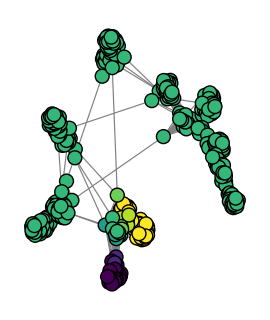

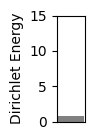

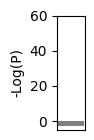

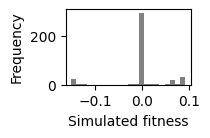

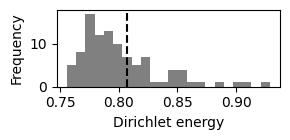

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_50498/2394335222.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


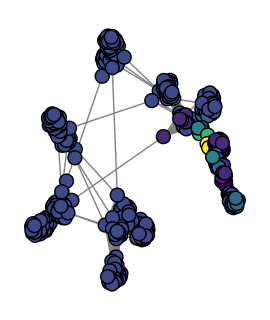

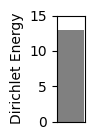

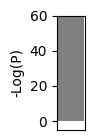

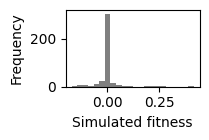

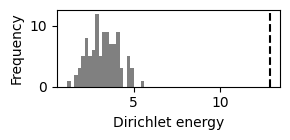

In [128]:
seq_ls = list(seq_dict.values())
values = [0]*len(seq_ls)
G = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                    values=values)

G_elem = graph_ruggedness_de.compute_elementary_landscape(G,
                                                 6)
pos = nx.spring_layout(G)
dir_energy = graph_ruggedness_de.compute_dirichlet_energy(G=G_elem)
prior_arr = brownian_motion.sample_prior_dist(G=G_elem, ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy, sample_size=0.5)
logp = brownian_motion.compute_log_probability(prior_arr=prior_arr, empirical_val=dir_energy)
values = [node[1]['value'] for node in G_elem.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
node_colors = [viridis((value - min(values)) / (max(values) - min(values))) for value in values]


plt.figure(figsize=(2.5, 3))
nx.draw(G_elem, pos, node_color=node_colors, with_labels=False, edgecolors='black', node_size=100, width=0.85, edge_color='grey')
plt.savefig('figures/Figure_1/0th_eigvector_graph.pdf')
plt.show()

plt.figure(figsize=(1.05, 1.5))
plt.bar(x=0, height=dir_energy, color='grey')
plt.xticks([])
plt.ylim(0, 15)
plt.ylabel('Dirichlet Energy')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_1_DE.pdf')
plt.show()

plt.figure(figsize=(1.05, 1.5))
plt.bar(x=0, height=-logp, color='grey')
plt.xticks([])
plt.ylim(-5, 60)
plt.ylabel('-Log(P)')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_1_logp.pdf')
plt.show()

plt.figure(figsize=(2.2, 1.5))
plt.hist(values, bins=22, color='grey')
plt.xlabel('Simulated fitness')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_1_hist.pdf')
plt.show()

plt.figure(figsize=(3, 1.5))
plt.hist(prior_arr, bins=22, color='grey', zorder=1)
plt.xlabel('Dirichlet energy')
plt.ylabel('Frequency')
plt.axvline(dir_energy, linestyle = '--', color='black', zorder=2)
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_1_hist_prior_arr.pdf')
plt.show()

G_elem = graph_ruggedness_de.compute_elementary_landscape(G,
                                                 20)
dir_energy = graph_ruggedness_de.compute_dirichlet_energy(G=G_elem)
prior_arr = brownian_motion.sample_prior_dist(G=G_elem, ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy, sample_size=0.5)
logp = brownian_motion.compute_log_probability(prior_arr=prior_arr, empirical_val=dir_energy)
values = [node[1]['value'] for node in G_elem.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
node_colors = [viridis((value - min(values)) / (max(values) - min(values))) for value in values]


plt.figure(figsize=(2.5, 3))
nx.draw(G_elem, pos, node_color=node_colors, with_labels=False, edgecolors='black', node_size=100, width=1, edge_color='grey')
plt.savefig('figures/Figure_1/50th_eigvector_graph.pdf')
plt.show()

plt.figure(figsize=(1.05, 1.5))
plt.bar(x=0, height=dir_energy, color='grey')
plt.xticks([])
plt.ylim(0, 15)
plt.ylabel('Dirichlet Energy')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_50_DE.pdf')
plt.show()

plt.figure(figsize=(1.05, 1.5))
plt.bar(x=0, height=-logp, color='grey')
plt.xticks([])
plt.ylim(-5, 60)
plt.ylabel('-Log(P)')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_50_logp.pdf')
plt.show()

plt.figure(figsize=(2.2, 1.5))
plt.hist(values, bins=22, color='grey')
plt.xlabel('Simulated fitness')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_50_hist.pdf')
plt.show()

plt.figure(figsize=(3, 1.5))
plt.hist(prior_arr, bins=22, color='grey', zorder=1)
plt.xlabel('Dirichlet energy')
plt.ylabel('Frequency')
plt.axvline(dir_energy, linestyle = '--', color='black', zorder=2)
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_50_hist_prior_arr.pdf')
plt.show()

## Sampling with Diffusion


In [14]:
rep_dict = {}
rep_de_dict = {}
rep_sample_info_dict = {}

#Iterate through landscape simulations.
for _ in range(10):
    try:
        #Sample evolutionary parameters.
        num_nodes = int(np.random.uniform(50, 2000))
        mean_branch_length = np.random.uniform(0.01, 0.5)
        std_dev_branch_length = np.random.uniform(0.001, 0.1)
        alpha = np.random.uniform(0.1, 0.5)
        model = random.choice(('WAG', 'LG'))
        rate_categoies = 4
        sequence_length = int(np.random.uniform(100, 600))

        sample_info = {
            'num_nodes' : num_nodes,
            'mean_branch_length' : mean_branch_length,
            'std_dev_branch_length' : std_dev_branch_length,
            'alpha' : alpha,
            'model' : model,
            'sequence_length' : sequence_length
        }

        #Perform sequence evolution.
        seq_dict = sequence_evolution.sequence_evolution(num_nodes=num_nodes,
                                                        mean_branch_length=mean_branch_length,
                                                        std_dev_branch_length=std_dev_branch_length,
                                                        alpha=alpha,
                                                        model=model,
                                                        rate_categories=rate_categoies,
                                                        sequence_length=sequence_length
                                                        )
        #Construct graph from simulated sequences.
        seq_ls = list(seq_dict.values())
        values = [0]*len(seq_ls)
        G = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                            values=values)
        de_logprob_dict = {}
        de_dict = {}
        
        #Define the sampling proportions.
        sample_list = list(np.linspace(0.1, 0.9, 20))
        eign_list = list(range(10))
        
        #Iterate through Laplacian eigenvectors.
        for eign in eign_list:
            
            #Assign fitness scores as eigenvectors.
            G = graph_ruggedness_de.compute_elementary_landscape(G=G, n=eign)
            
            #Compute energy.
            dir_energy = graph_ruggedness_de.compute_dirichlet_energy(G=G)
            
            #Determine log(P).
            for sample_size in sample_list:
                pr_arr = brownian_motion.sample_prior_dist(G=G,
                                                        sample_size=sample_size,
                                                        ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy,
                                                        local=False,
                                                        replicates=10)
                
                #Save -log(P) to dictionary with eigenvector idx and sampling prop.
                de_logprob_dict[(eign, sample_size)] = -brownian_motion.compute_log_probability(prior_arr=pr_arr,
                                                                                            empirical_val=dir_energy)
        
            #Save dirichlet energy to dictionary with eigenvector idx.
            de_dict[eign] = dir_energy


        #Store evolutionary parameters.
        rep_sample_info_dict[_] = sample_info

        #Store -log(P) information to dictionary per replicate.
        rep_dict[_] = de_logprob_dict
        
        #Store Dirichlet energy to dictionary per replicate.
        rep_de_dict[_] = de_dict
    
    except Exception:
        continue

Computing OHE dictionary.: 20it [00:00, 298526.98it/s]
Adding nodes to graph.: 716it [00:00, 41795.36it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 716it [00:00, 67584.60it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 142663.40it/s]
Adding nodes to graph.: 1649it [00:00, 15977.73it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 1649it [00:00, 44278.04it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 295373.52it/s]
Adding nodes to graph.: 1910it [00:00, 10312.34it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 1910it [00:00, 39814.72it/s]

Connecting components



/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 196454.52it/s]
Adding nodes to graph.: 269it [00:00, 32795.62it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 269it [00:00, 113507.82it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 247451.56it/s]
Adding nodes to graph.: 1911it [00:00, 32327.38it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 1911it [00:00, 41671.99it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 297468.37it/s]
Adding nodes to graph.: 1075it [00:00, 32770.38it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 1075it [00:00, 16958.25it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 311844.16it/s]
Adding nodes to graph.: 1728it [00:00, 45568.19it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 1728it [00:00, 42229.70it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 137970.53it/s]
Adding nodes to graph.: 637it [00:00, 28076.63it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 637it [00:00, 43268.26it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 235635.06it/s]
Adding nodes to graph.: 1073it [00:00, 10149.15it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 1073it [00:00, 50370.89it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing OHE dictionary.: 20it [00:00, 232371.41it/s]
Adding nodes to graph.: 393it [00:00, 10266.20it/s]


Computing all vs. all OHE distance matrix.
Done.
Fitting all vs. all OHE distance model.
Done.


Adding KNN edges.: 393it [00:00, 100743.28it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:117: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])


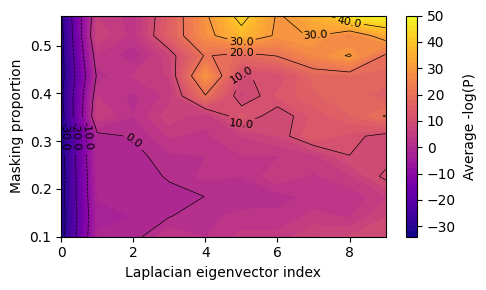

In [94]:
# Compute the average z-values for each coordinate
averaged_data = {}
for key in rep_dict[0].keys():
    z_values = [entry[key] for entry in rep_dict.values()]
    averaged_data[key] = np.mean(z_values)

# Extract x, y, and averaged z values from the averaged_data
x_values = np.array([key[0] for key in averaged_data.keys()])
y_values = np.array([key[1] for key in averaged_data.keys()])
z_values = np.array(list(averaged_data.values()))

# Create a grid for contouring
x_unique = np.unique(x_values)
y_unique = np.unique(y_values)[0:12]
x_grid, y_grid = np.meshgrid(x_unique, y_unique)

# Reshape z_values to match the grid
z_grid = np.empty_like(x_grid, dtype=float)
for i in range(len(x_unique)):
    for j in range(len(y_unique)):
        z_grid[j, i] = averaged_data.get((x_unique[i], y_unique[j]), np.nan)

# Plot the contour map with filled contours and contour lines
plt.figure(figsize=(5, 3))
contour_filled = plt.contourf(x_grid, y_grid, z_grid, levels=50, cmap='plasma')
contour_lines = plt.contour(x_grid, y_grid, z_grid, levels=8, colors='black', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")
cbar = plt.colorbar(contour_filled)
cbar.set_label('Average -log(P)', rotation=90, labelpad=5)
plt.xlabel('Laplacian eigenvector index')
plt.ylabel('Masking proportion')
plt.tight_layout()
plt.savefig('figures/Figure_1/eigenvector_sampling_prop_average_logp.pdf')
plt.show()

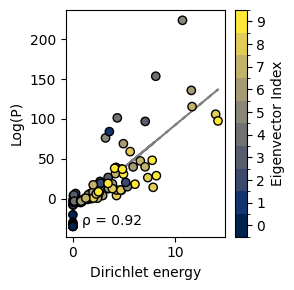

In [19]:
logp = []
de = []
eigs = []

for rep in rep_de_dict.keys():
    for eig in range(10):
        logp.append(rep_dict[rep][(eig,0.5210526315789473)])
        de.append(rep_de_dict[rep][eig])
        eigs.append(eig)

# Compute Spearman rho correlation
rho, p_value = spearmanr(de, logp)

# Fit a line of best fit (you can use np.polyfit for linear regression)
slope, intercept = np.polyfit(de, logp, 1)
best_fit_line = np.array(de) * slope + intercept

# Discrete colormap setup
cmap = plt.get_cmap('cividis', np.max(eigs) - np.min(eigs) + 1)
norm = mcolors.BoundaryNorm(np.arange(np.min(eigs), np.max(eigs) + 2) - 0.5, cmap.N)

plt.figure(figsize=(3, 3))

plt.xlabel('Dirichlet energy')
plt.ylabel('Log(P)')

# Plot the line of best fit first (so it appears behind the scatter plot)
plt.plot(de, best_fit_line, color='grey', linestyle='--', zorder=1)

# Scatter plot with color based on eigenvalue index
sc = plt.scatter(de, logp, c=eigs, cmap=cmap, norm=norm, linewidths=1, edgecolors='black', zorder=2)

# Adding a colorbar with integer values
cbar = plt.colorbar(sc, ticks=np.arange(np.min(eigs), np.max(eigs) + 1))
cbar.set_label('Eigenvector Index')

# Annotate the Spearman rho value in the bottom left corner
plt.text(0.1, 0.05, f'ρ = {rho:.2f}', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.savefig('figures/Figure_1/logp_vs_de.pdf')
plt.show()

### Evolutionary parameter variable correlation against -log(P)

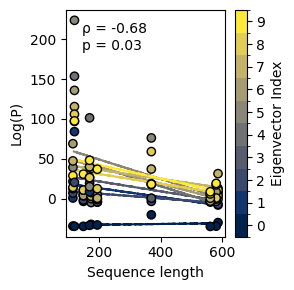

In [113]:
variable = 'sequence_length'

logp = []
var = []
eigs_ls = list(range(10))
eigs = []

for rep in rep_dict.keys():
    for eig in eigs_ls:
        logp.append(rep_dict[rep][(eig,0.5210526315789473)])
        var.append(rep_sample_info_dict[rep][f'{variable}'])
        eigs.append(eig)


# Discrete colormap setup
cmap = plt.get_cmap('cividis', np.max(eigs) - np.min(eigs) + 1)
norm = mcolors.BoundaryNorm(np.arange(np.min(eigs), np.max(eigs) + 2) - 0.5, cmap.N)

plt.figure(figsize=(3, 3))

plt.xlabel(f'{variable}')
plt.xlabel('Sequence length')
plt.ylabel('Log(P)')

#Compute spearman rho for each eigenvector
for eig in eigs_ls:

    # Compute Spearman rho correlation
    rho, p_value = spearmanr(var[eig::10], logp[eig::10])

    # Fit a line of best fit (you can use np.polyfit for linear regression)
    slope, intercept = np.polyfit(var[eig::10], logp[eig::10], 1)
    best_fit_line = np.array(var[eig::10]) * slope + intercept

    # Plot the line of best fit first (so it appears behind the scatter plot)
    plt.plot(var[eig::10], best_fit_line, color=cmap(eig), linestyle='--', zorder=1)


# Scatter plot with color based on eigenvalue index
sc = plt.scatter(var, logp, c=eigs, cmap=cmap, norm=norm, linewidths=1, edgecolors='black', zorder=2)

# Adding a colorbar with integer values
cbar = plt.colorbar(sc, ticks=np.arange(np.min(eigs), np.max(eigs) + 1))

cbar.set_label('Eigenvector Index')

# Annotate the Spearman rho value in the bottom left corner
plt.text(0.1, 0.9, f'ρ = {rho:.2f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 0.825, f'p = {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()

plt.savefig('si_figures/logp_vs_evol_parameters/logp_vs_sequence_length.pdf')

plt.show()

### Evolutionary parameter variable correlation against Dirichlet energy

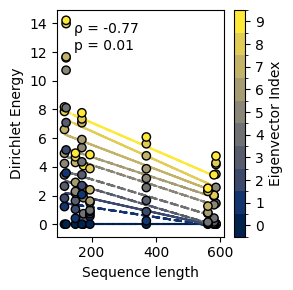

In [112]:
variable = 'sequence_length'

de = []
var = []
eigs_ls = list(range(10))
eigs = []

for rep in rep_de_dict.keys():
    for eig in eigs_ls:
        de.append(rep_de_dict[rep][eig])
        var.append(rep_sample_info_dict[rep][f'{variable}'])
        eigs.append(eig)


# Discrete colormap setup
cmap = plt.get_cmap('cividis', np.max(eigs) - np.min(eigs) + 1)
norm = mcolors.BoundaryNorm(np.arange(np.min(eigs), np.max(eigs) + 2) - 0.5, cmap.N)

plt.figure(figsize=(3, 3))

plt.xlabel(f'{variable}')
plt.xlabel('Sequence length')
plt.ylabel('Dirichlet Energy')

#Compute spearman rho for each eigenvector
for eig in eigs_ls:

    # Compute Spearman rho correlation
    rho, p_value = spearmanr(var[eig::10], de[eig::10])

    # Fit a line of best fit (you can use np.polyfit for linear regression)
    slope, intercept = np.polyfit(var[eig::10], de[eig::10], 1)
    best_fit_line = np.array(var[eig::10]) * slope + intercept

    # Plot the line of best fit first (so it appears behind the scatter plot)
    plt.plot(var[eig::10], best_fit_line, color=cmap(eig), linestyle='--', zorder=1)

# Scatter plot with color based on eigenvalue index
sc = plt.scatter(var, de, c=eigs, cmap=cmap, norm=norm, linewidths=1, edgecolors='black', zorder=2)

# Adding a colorbar with integer values
cbar = plt.colorbar(sc, ticks=np.arange(np.min(eigs), np.max(eigs) + 1))

cbar.set_label('Eigenvector Index')

# Annotate the Spearman rho value in the bottom left corner
plt.text(0.1, 0.9, f'ρ = {rho:.2f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 0.825, f'p = {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()

plt.savefig('si_figures/de_vs_evol_parameters/de_vs_sequence_length.pdf')

plt.show()

### Standard deviation over simulation space across replicates.

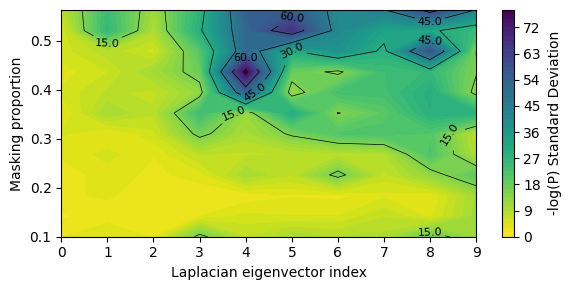

In [96]:
# Compute the average z-values for each coordinate
averaged_data = {}
for key in rep_dict[0].keys():
    z_values = [entry[key] for entry in rep_dict.values()]
    averaged_data[key] = np.std(z_values)

# Extract x, y, and averaged z values from the averaged_data
x_values = np.array([key[0] for key in averaged_data.keys()])
y_values = np.array([key[1] for key in averaged_data.keys()])
z_values = np.array(list(averaged_data.values()))

# Create a grid for contouring
x_unique = np.unique(x_values)
y_unique = np.unique(y_values)[0:12]
x_grid, y_grid = np.meshgrid(x_unique, y_unique)

# Reshape z_values to match the grid
z_grid = np.empty_like(x_grid, dtype=float)
for i in range(len(x_unique)):
    for j in range(len(y_unique)):
        z_grid[j, i] = averaged_data.get((x_unique[i], y_unique[j]), np.nan)

# Plot the contour map with filled contours and contour lines
plt.figure(figsize=(6, 3))
contour_filled = plt.contourf(x_grid, y_grid, z_grid, levels=50, cmap='viridis_r')
contour_lines = plt.contour(x_grid, y_grid, z_grid, levels=5, colors='black', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")
cbar=plt.colorbar(contour_filled)
cbar.set_label('-log(P) Standard Deviation', rotation=90, labelpad=5)
plt.xlabel('Laplacian eigenvector index')
plt.ylabel('Masking proportion')
plt.tight_layout()
plt.savefig('si_figures/dir_sampl_sd/eigenvector_sampling_prop_std_logp.pdf')

plt.show()